# Module 11 HW: Data Visualizaiton

Author: Jackson Viscomi \
Class: BMI 6018

In [1]:
import pandas as pd

In [8]:
import numpy as np
import matplotlib.pyplot as plt

## Plot 1: Visit types by Age Group

In [206]:
#read diabetes data into pandas
path = 'C:/Users/jcviscom/OneDrive - Intermountain Healthcare/BMI Degree/6018/Module 11/diabetic_data.csv'
diabetes_data = pd.read_csv(path)

In [207]:
#group diabetes data by age, aggregate by number of OP/IP/ED visits
diabetes_data_groupby = diabetes_data.groupby('age').agg({'number_outpatient':'sum',\
                                                          'number_emergency':'sum',\
                                                          'number_inpatient':'sum'})
diabetes_data_groupby.reset_index(inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

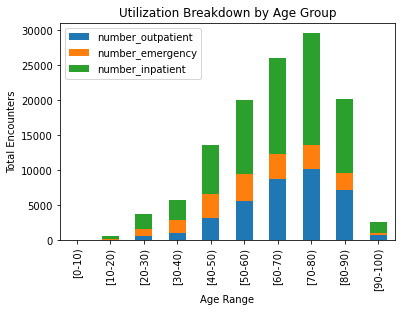

In [208]:
#create stacked bar chart with age as x axis, number of OP/IP/ED visits as stacked y-axis
diabetes_data_groupby.plot(x = 'age', kind = 'bar', stacked = True)
plt.title('Utilization Breakdown by Age Group')
plt.xlabel('Age Range')
plt.ylabel('Total Encounters')
plt.show

## Plot 2: Breast Cancer Location Pie Chart

In [209]:
#read breast cancer data into pandas
path = 'C:/Users/jcviscom/OneDrive - Intermountain Healthcare/BMI Degree/6018/Module 11/breast-cancer-data.csv'
breast_cancer_data = pd.read_csv(path)

In [156]:
#group by breast, breast quad, count columns
bc_groupby = breast_cancer_data.groupby(['breast','breast-quad']).agg(['count'])
#reset index so we can plot
bc_groupby.reset_index(inplace = True)
#clean out missing data
bc_groupby = bc_groupby[(bc_groupby['breast-quad'] != '?')]
#create new column that combines breast + breast quadrant
bc_groupby['breastandquad'] = (bc_groupby['breast'] + ' ' + bc_groupby['breast-quad']) 

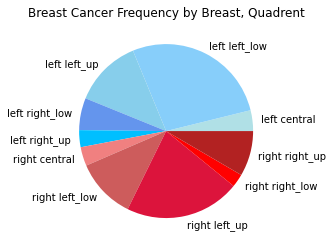

In [210]:
#pie chart using breast+breast quadrant with row count as values
y = bc_groupby['Class']['count']
mylabels = bc_groupby['breastandquad']
# cool colors to visually seperate left vs. right breast
mycolors = ['#B0E0E6','#87CEFA','#87CEEB','#6495ED','#00BFFF','#F08080','#CD5C5C','#DC143C','#FF0000','#B22222']

plt.pie(y, labels = mylabels, colors = mycolors)
plt.title('Breast Cancer Frequency by Breast, Quadrent')
plt.show() 

## Plot 3: Breast Cancer Distribution by Age

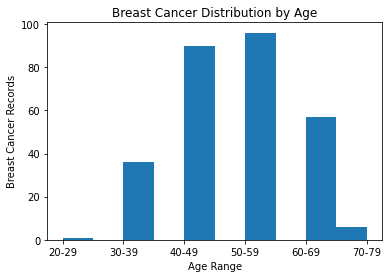

In [211]:
#using 'Age' slice of df as histrogram feed
#sorting values before processing
plt.hist(breast_cancer_data['age'].sort_values())
plt.title('Breast Cancer Distribution by Age')
plt.xlabel('Age Range')
plt.ylabel('Breast Cancer Records')
plt.show()

## Plot 4: Avg. Heart Rate by Age

In [212]:
#read heart arrhythmia data into pandas
path = 'C:/Users/jcviscom/OneDrive - Intermountain Healthcare/BMI Degree/6018/Module 11/HRData.csv'
HR_data = pd.read_csv(path)

In [214]:
#taking out missing HR values
HR_data = HR_data[HR_data['Heart Rate'] != '?'] 
#casting HR as int
HR_data['Heart Rate'] = HR_data['Heart Rate'].astype(int)

<ipython-input-214-d2f3e3aa9857>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HR_data['Heart Rate'] = HR_data['Heart Rate'].astype(int)


In [215]:
#group by age, aggreate by median HR
HR_data_GB = HR_data.groupby('Age').agg({'Heart Rate':'median'})
#sort by age for plot
HR_data_GB.sort_values(by = ['Age'], inplace = True)
HR_data_GB.reset_index(inplace = True)

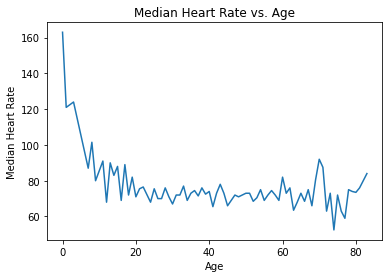

In [217]:
#x: Age, y: Median HR
labels = np.array(HR_data_GB['Age'])
values = np.array(HR_data_GB['Heart Rate'])

# creating the bar plot
plt.plot(labels, values)
 
plt.xlabel('Age')
plt.ylabel('Median Heart Rate')
plt.title('Median Heart Rate vs. Age')
plt.show()